<a href="https://colab.research.google.com/github/kameoman/pythonlesson/blob/main/%E5%8F%8E%E7%A9%AB%E9%87%8F%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pystan
!pip install fbprophet

In [50]:
import pandas as pd
from fbprophet import Prophet

In [122]:
years = [2018, 2019, 2020]
df = pd.DataFrame()
for year in years:
    _df = pd.read_csv(f'/content/syukaku{year}.csv', encoding="cp932")
    df = pd.concat([df, _df], axis=0)

In [125]:
df.tail()

,DATE,出荷実績
361,2020/12/27,0
362,2020/12/28,0
363,2020/12/29,0
364,2020/12/30,0
365,2020/12/31,0


In [126]:
datas = []

for index,datum in df.iterrows():
    count = datum['出荷実績']
    data = f'{count}'

    datas.append(data)



In [127]:
datas[:3]


['0', '0', '0']

In [128]:
df['y'] = datas

In [129]:
df.head()

,DATE,出荷実績,y
0,2018/1/1,0,0
1,2018/1/2,0,0
2,2018/1/3,0,0
3,2018/1/4,0,0
4,2018/1/5,0,0


In [130]:
dates = []

for index, datum in df.iterrows():
    date = datum['DATE']
    str_date = f'{date}'
    dates.append(date)
    


In [152]:
from datetime import datetime as dt

In [153]:
dates[:3]

['2018/1/1', '2018/1/2', '2018/1/3']

In [154]:
df['ds'] = dates

In [155]:
df.head()

,DATE,出荷実績,y,ds
0,2018/1/1,0,0,2018/1/1
1,2018/1/2,0,0,2018/1/2
2,2018/1/3,0,0,2018/1/3
3,2018/1/4,0,0,2018/1/4
4,2018/1/5,0,0,2018/1/5


In [156]:
model = Prophet()

In [157]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [158]:
future = model.make_future_dataframe(24*365, freq='H')
future.tail

<bound method NDFrame.tail of                       ds
0    2018-01-01 00:00:00
1    2018-01-02 00:00:00
2    2018-01-03 00:00:00
3    2018-01-04 00:00:00
4    2018-01-05 00:00:00
...                  ...
9851 2021-12-30 20:00:00
9852 2021-12-30 21:00:00
9853 2021-12-30 22:00:00
9854 2021-12-30 23:00:00
9855 2021-12-31 00:00:00

[9856 rows x 1 columns]>

In [159]:
forecast = model.predict(future)

In [160]:
import matplotlib.pyplot as plt

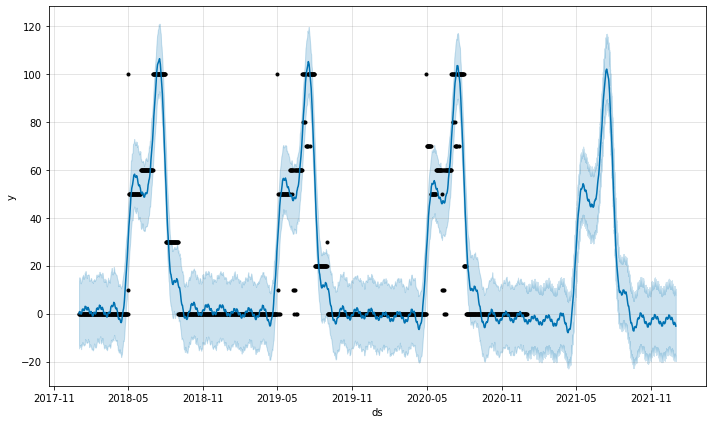

In [161]:
model.plot(forecast)
plt.show()

In [162]:
df_2020 = pd.read_csv(f'/content/syukaku2020.csv', encoding="cp932")

In [163]:
df_2020.head()

,DATE,出荷実績
0,2020/1/1,0
1,2020/1/2,0
2,2020/1/3,0
3,2020/1/4,0
4,2020/1/5,0


In [171]:
forecast_2020 = forecast[forecast['ds'] >= dt(2020, 1, 1)].reset_index(drop=True)
forecast_2020.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,17.619758,-15.425307,13.493254,17.619758,17.619758,-19.227021,-19.227021,-19.227021,0.508596,0.508596,0.508596,-19.735616,-19.735616,-19.735616,0.0,0.0,0.0,-1.607263
1,2020-01-02,17.615827,-15.650848,12.447681,17.615827,17.615827,-19.283532,-19.283532,-19.283532,0.512223,0.512223,0.512223,-19.795755,-19.795755,-19.795755,0.0,0.0,0.0,-1.667706
2,2020-01-03,17.611896,-15.953309,10.827627,17.611896,17.611896,-20.080657,-20.080657,-20.080657,-0.273644,-0.273644,-0.273644,-19.807013,-19.807013,-19.807013,0.0,0.0,0.0,-2.468761
3,2020-01-04,17.607965,-16.865729,11.070585,17.607965,17.607965,-20.425710,-20.425710,-20.425710,-0.655146,-0.655146,-0.655146,-19.770564,-19.770564,-19.770564,0.0,0.0,0.0,-2.817746
4,2020-01-05,17.604033,-17.288199,11.622008,17.604033,17.604033,-20.340942,-20.340942,-20.340942,-0.651799,-0.651799,-0.651799,-19.689143,-19.689143,-19.689143,0.0,0.0,0.0,-2.736909


In [172]:
df_2020 = df_2020.rename(columns={'出荷実績': 'y'})
df_2020.head()

,DATE,y
0,2020/1/1,0
1,2020/1/2,0
2,2020/1/3,0
3,2020/1/4,0
4,2020/1/5,0


In [178]:
results = pd.DataFrame()
#実測値
results['t'] = df_2020['y']
#予測値
results['y'] = forecast_2020['yhat']

results['diff'] = results['t'] - results['y']

results[180:200]

,t,y,diff
180,60,68.674482,-8.674482
181,100,72.314932,27.685068
182,100,74.837060,25.162940
183,100,77.678126,22.321874
184,80,79.762399,0.237601
185,100,82.248924,17.751076
186,80,85.080623,-5.080623
187,100,88.281509,11.718491
188,100,91.869334,8.130666
189,80,94.084027,-14.084027
